## **Notebook Setup**

In [1]:
# !which python
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install ipython --upgrade
# !pip install jedi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
sns.set()

## **Load Data**

In [4]:
data = datasets.load_iris()

In [5]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### **Create pandas dataframe from the data**

In [6]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [7]:
df["target"] = data["target"]

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Basic Descriptive Statistics**

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


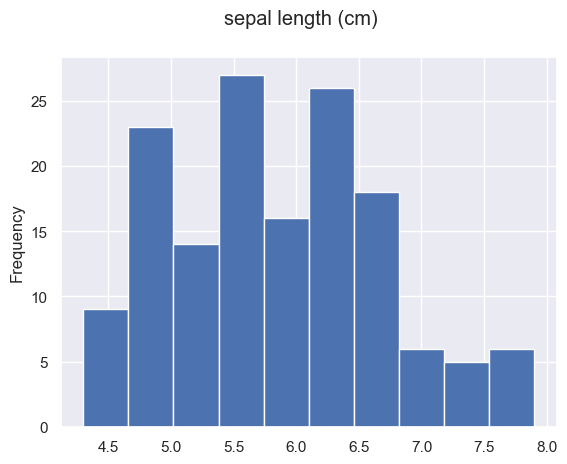

In [10]:
col = 'sepal length (cm)'
df[col].plot(kind="hist")
plt.suptitle(col)
plt.show()

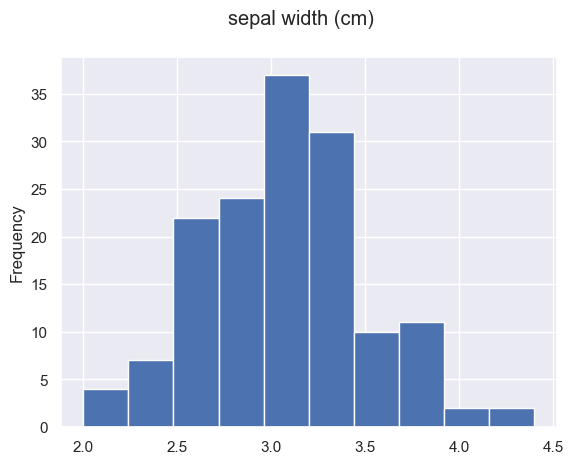

In [11]:
col = 'sepal width (cm)'
df[col].plot(kind="hist")
plt.suptitle(col)
plt.show()

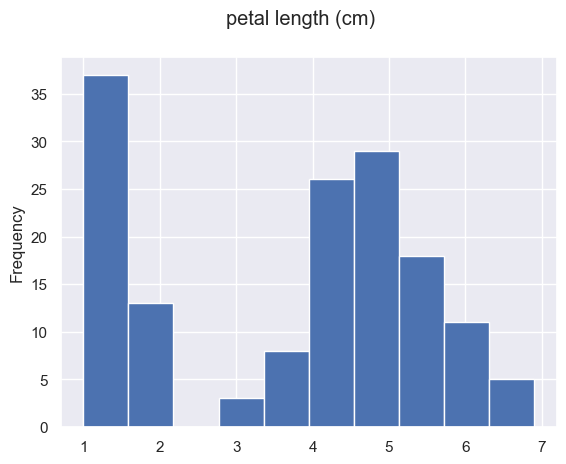

In [12]:
col = 'petal length (cm)'
df[col].plot(kind="hist")
plt.suptitle(col)
plt.show()

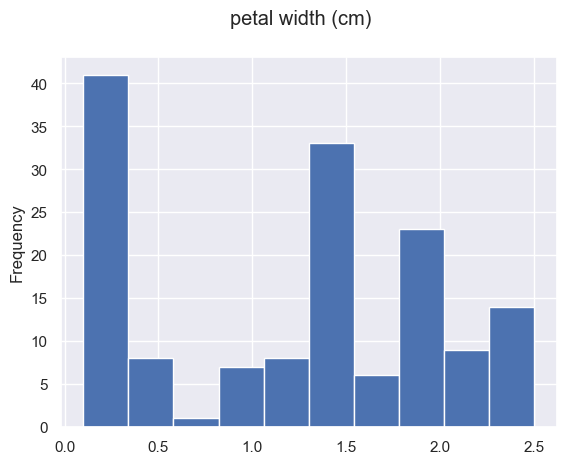

In [13]:
col = 'petal width (cm)'
df[col].plot(kind="hist")
plt.suptitle(col)
plt.show()

## **Relationship of data features with target**

In [14]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

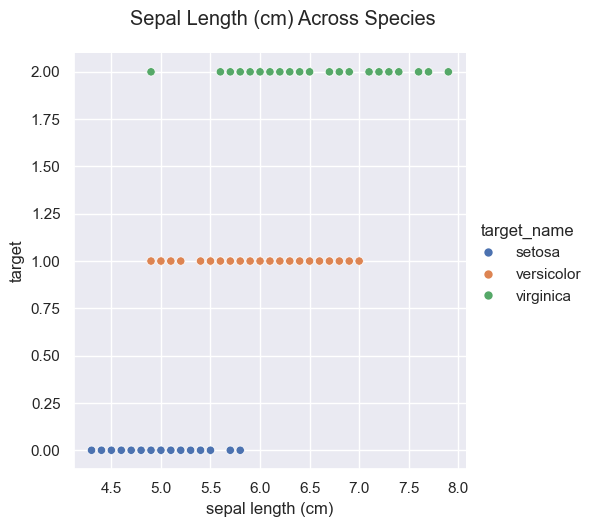

In [16]:
col = 'sepal length (cm)'
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle("Sepal Length (cm) Across Species", y=1.05)
plt.show()

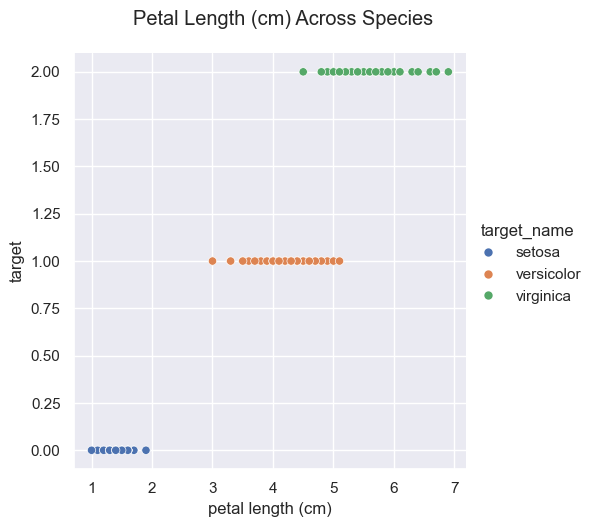

In [17]:
col = 'petal length (cm)'
sns.relplot(x=col, y="target", hue="target_name", data=df)
plt.suptitle("Petal Length (cm) Across Species", y=1.05)
plt.show()

## **Exploratory Data Analysis - Pairplots**

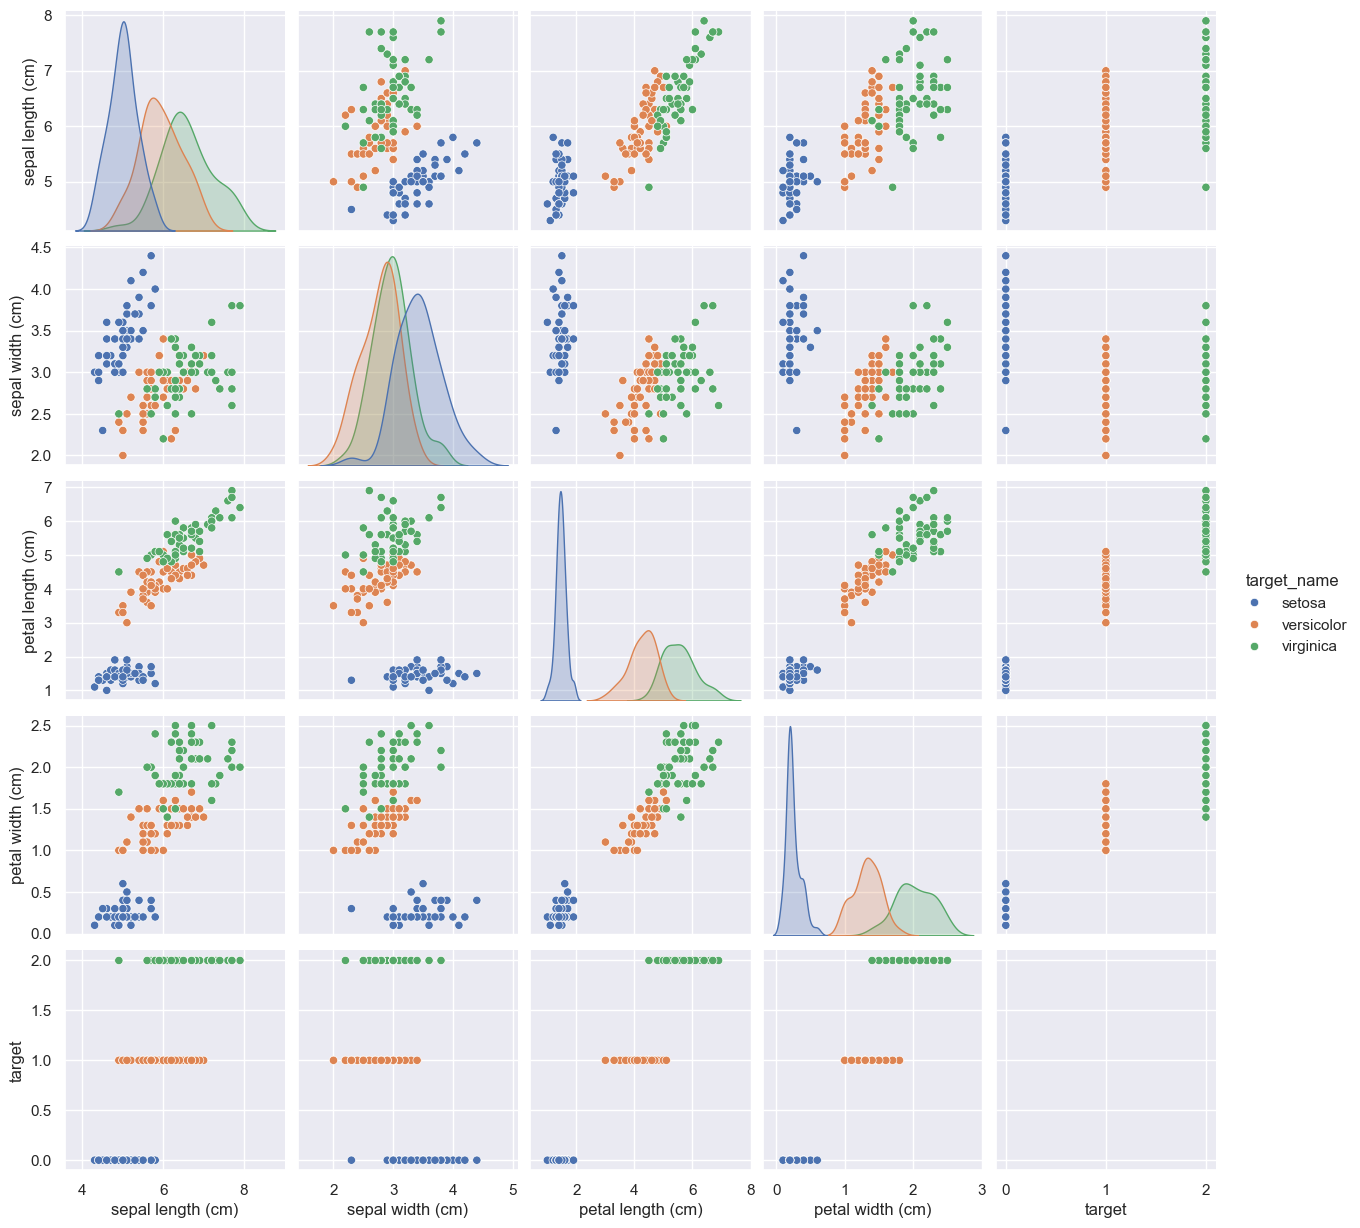

In [18]:
sns.pairplot(df, hue="target_name")

## **Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25)

In [20]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
31,5.4,3.4,1.5,0.4,0,setosa
81,5.5,2.4,3.7,1.0,1,versicolor
70,5.9,3.2,4.8,1.8,1,versicolor
118,7.7,2.6,6.9,2.3,2,virginica
140,6.7,3.1,5.6,2.4,2,virginica


## **Prepare data for modelling**
This involves splitting the data back out into plain NumPy arrays.

In [21]:
## X_train: get the numpy array version of columns excluding target & target_name
## y_train: get the numpy array version of target column
## df_train.drop returns a new object, unless you set inplace=True
X_train, y_train = df_train.drop(columns=["target", "target_name"]).values, df_train["target"].values
X_test, y_test = df_test.drop(columns=["target", "target_name"]).values, df_test["target"].values

## **Modelling - what is our baseline?**
What is the simplest model we can think of?

In this case, if our basline model is just randomly guessing the species of the flower, or guessing a single species of flower for every data point, we would expect to have a model accuracy of 0.33 or 33%, since we have 3 different classes that are evenly balanced.

So our models should at least beat 33% accuracy.

## **Modelling - Logistic Regression**
**Using a validation set to evaluate our model**

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)
model.fit(Xt, yt)

print(f"Cross-validation Accuracy: {model.score(Xv, yv)*100:.2f}%")

Cross-validation Accuracy: 96.43%


### **Using cross-validation to evaluate our model**

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict

model = LogisticRegression(max_iter=200)
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

print(f"Cross-validation Accuracy: {np.mean(accuracies)*100:.2f}%")

Cross-validation Accuracy: 94.66%


## **Where are we misclassifying points?**

In [24]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

predicted_correctly_mask = y_pred == y_train
not_predicted_correctly = ~predicted_correctly_mask

X_train[not_predicted_correctly]

array([[5.9, 3.2, 4.8, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5. , 1.7],
       [6. , 3. , 4.8, 1.8],
       [6. , 2.7, 5.1, 1.6]])

In [25]:
df_predictions = df_train.copy()

df_predictions["prediction"] = y_pred
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df_predictions["correct_prediction"] = predicted_correctly_mask

df_predictions.query("correct_prediction == False")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,prediction,prediction_label,correct_prediction
70,5.9,3.2,4.8,1.8,1,versicolor,2,virginica,False
126,6.2,2.8,4.8,1.8,2,virginica,1,versicolor,False
119,6.0,2.2,5.0,1.5,2,virginica,1,versicolor,False
77,6.7,3.0,5.0,1.7,1,versicolor,2,virginica,False
138,6.0,3.0,4.8,1.8,2,virginica,1,versicolor,False
83,6.0,2.7,5.1,1.6,1,versicolor,2,virginica,False


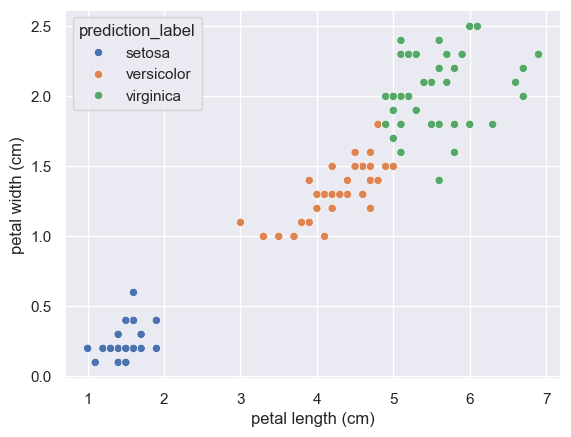

In [26]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediction_label", data=df_predictions)
plt.show()

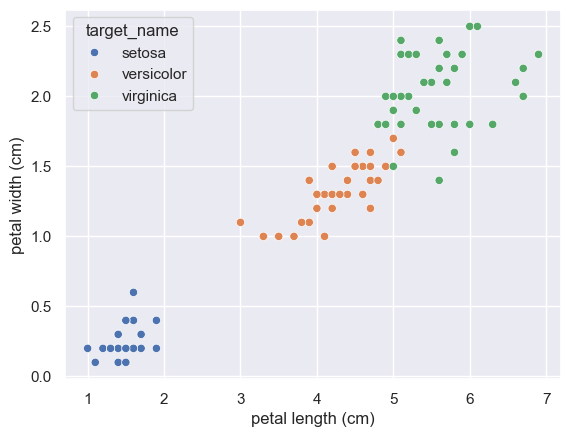

In [27]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_name", data=df_predictions)
plt.show()

In [28]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)

    plt.show()


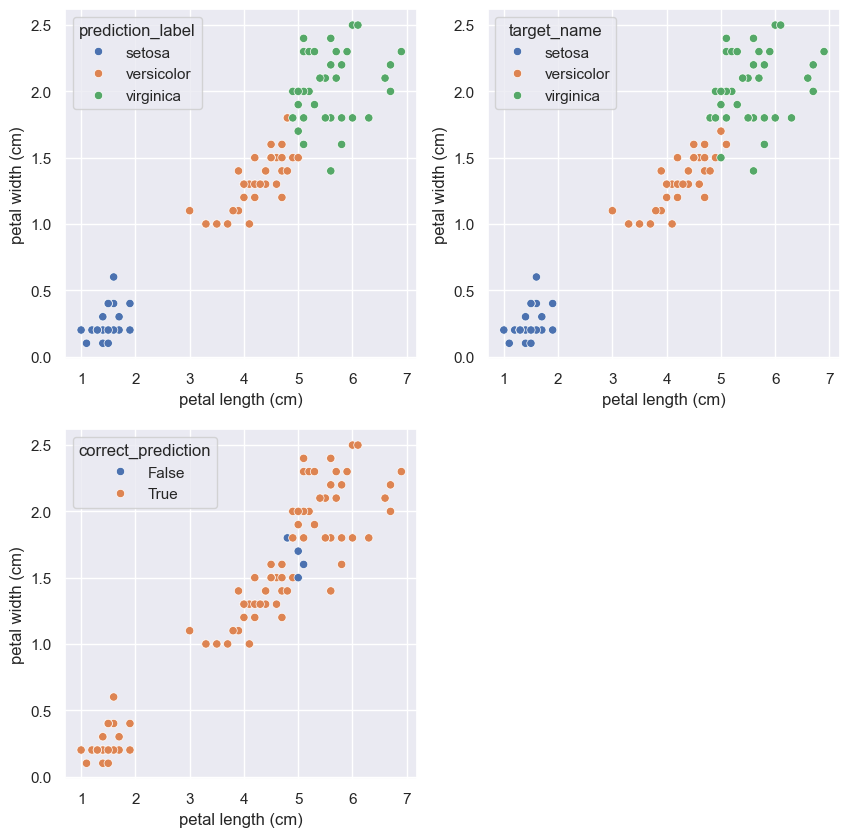

In [29]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

## **Model Tuning**

**What is model tuning?**

Model tuning is trying to determine the parameters of your model (also known as ***hyperparameters***) that maximise the model performance.

**Regularization** is important to look out for. Regularizing more means we want the model to be simpler, less prone to overfitting. Less regularization means we want the model to lean more towards memorizing, too much will lead to overfitting.

In [30]:
for reg_param in (0.1, 0.3, 0.9, 1, 1.3, 1.9, 2, 2.3, 2.9, 3):
    model = LogisticRegression(max_iter=200, C=reg_param)
    accs = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"Reg Param: {reg_param}\n Accuracy: {np.mean(accs)*100:.2f}%\n")

Reg Param: 0.1
 Accuracy: 92.89%

Reg Param: 0.3
 Accuracy: 95.57%

Reg Param: 0.9
 Accuracy: 94.66%

Reg Param: 1
 Accuracy: 94.66%

Reg Param: 1.3
 Accuracy: 94.66%

Reg Param: 1.9
 Accuracy: 94.66%

Reg Param: 2
 Accuracy: 94.66%

Reg Param: 2.3
 Accuracy: 94.66%

Reg Param: 2.9
 Accuracy: 94.66%

Reg Param: 3
 Accuracy: 94.66%



## **Final Model**
**Use full training dataset to train final model**

In [32]:
model = LogisticRegression(max_iter=200, C=1.5)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [33]:
final_acc = model.score(X_test, y_test)
print(f"Accuracy: {final_acc*100:.2f}%\n")

Accuracy: 94.74%



## **In conclusion...**

We achieved a **94.74%** accuracy on the test dataset using a Logistic Regression model with these model parameters:
```
{'C': 1.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
 ```